In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns

In [19]:
def load_results(results_path):
    results = pd.read_csv(results_path, index_col=0, header=[0, 1])
    results.rename(lambda x: '' if x.startswith('Unnamed') else x, axis=1, level=0, inplace=True)
    results.rename(lambda x: '' if x.startswith('Unnamed') else x, axis=1, level=1, inplace=True)
    return results

# Dataset V1

In [20]:
# Best set of features using KNN
results_path = Path(r'results\dataset_V1\baseline_methods\knn_classification_report\feature_selection_results.csv')
results = load_results(results_path)
results.sort_values(by=('macro avg', 'f1-score'), ascending=False, inplace=True)
' + '.join(list(results.iloc[0].features[results.iloc[0].features].index))

'flatness + spectral_centroid + zero_crossing_rate'

In [21]:
def formatter(x):
    if isinstance(x, float):
        return f'{x:.3f}'.rstrip('0')
    elif isinstance(x, bool):
        return '+' if x else '-'
    return x

print(
    results
    .head(5)[['macro avg', 'features']]
    .drop(columns=[('macro avg', 'support'), ('macro avg', 'recall'), ('macro avg', 'precision')])
    .rename(lambda x: x.replace('_', ' '), axis=1, level=1)
    .style
    .set_caption('Top 5 feature sets using KNN')
    .format(formatter=formatter)
    .hide()
    .to_latex()
)

\begin{table}
\caption{Top 5 feature sets using KNN}
\begin{tabular}{rrrrrrrrrr}
macro avg & \multicolumn{9}{r}{features} \\
f1-score & cqt & mfccs & flatness & spectral centroid & spectral rolloff & spectral contrast & zero crossing rate & chroma & STFT \\
0.57 & - & - & + & + & - & - & + & - & - \\
0.556 & - & - & + & + & - & - & + & + & - \\
0.556 & - & - & + & + & + & - & + & + & - \\
0.556 & - & + & - & + & - & + & + & - & - \\
0.554 & - & + & - & + & + & + & + & - & - \\
\end{tabular}
\end{table}



Text(0.5, 1.0, 'Precision/Recall for different feature sets')

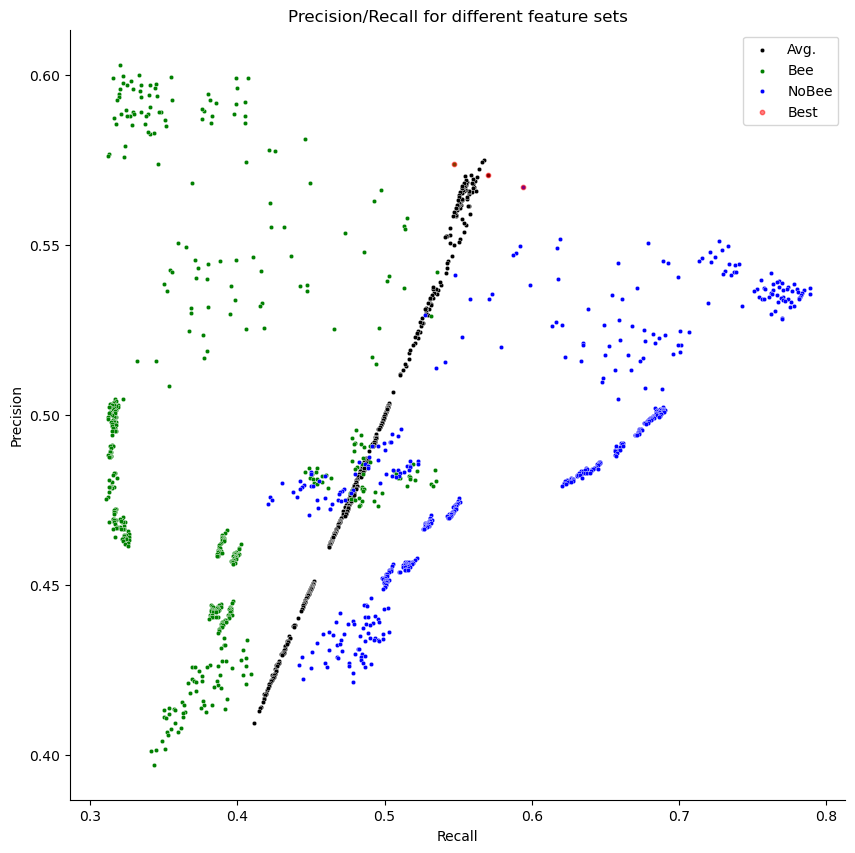

In [22]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=results['macro avg'], x='recall', y='precision', color='black', label='Avg.', s=10)
sns.scatterplot(data=results['Bee'], x='recall', y='precision', color='green', label='Bee', s=10)
ax = sns.scatterplot(data=results['NoBee'], x='recall', y='precision', color='blue', label='NoBee', s=10)
results.iloc[0].to_frame().T.Bee.plot(x='recall', y='precision', color='red', kind='scatter', s=10, ax=ax, alpha=0.5)
results.iloc[0].to_frame().T.NoBee.plot(x='recall', y='precision', color='red', kind='scatter', s=10, ax=ax, alpha=0.5)
results.iloc[0].to_frame().T['macro avg'].plot(x='recall', y='precision', color='red', kind='scatter', s=10, ax=ax, alpha=0.5, label='Best')
sns.despine()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall for different feature sets')

\begin{table}
\caption{Comparison of different classification methods on the winner feature set}
\begin{tabular}{rrrl}
\multicolumn{3}{r}{macro avg} & method \\
f1-score & precision & recall &  \\
0.594 & 0.595 & 0.594 & GradientBoosting \\
0.586 & 0.587 & 0.587 & SVC \\
0.584 & 0.584 & 0.584 & ExtraTrees \\
0.582 & 0.583 & 0.583 & RandomForest \\
0.57 & 0.57 & 0.57 & KNN \\
0.562 & 0.566 & 0.564 & LogisticRegression \\
0.47 & 0.489 & 0.491 & KMeans \\
0.369 & 0.56 & 0.507 & NN \\
\end{tabular}
\end{table}



Text(0.5, 1.0, 'Precision/Recall for different classification methods')

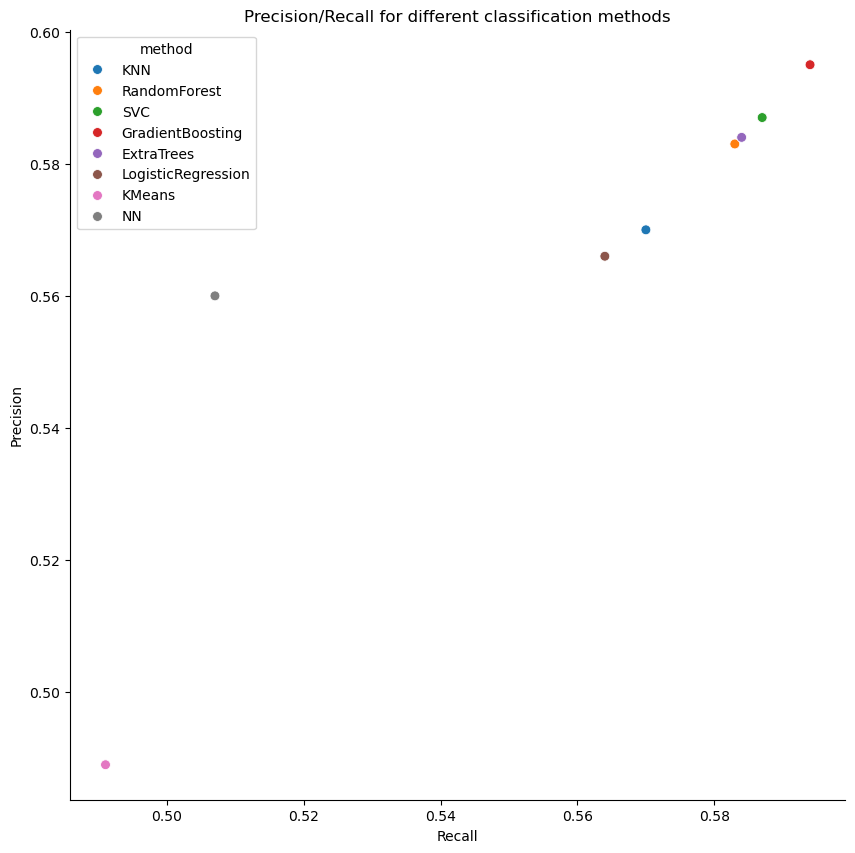

In [23]:
# Best baseline method on the best set of features
results_path = Path(r'results\dataset_V1\baseline_methods\results_methods.csv')
results = load_results(results_path)
results.sort_values(by=('macro avg', 'f1-score'), ascending=False, inplace=True)
print(
    results[['macro avg', 'method']]
    .drop(columns=[('macro avg', 'support')])
    .rename(lambda x: x.replace('_', ' '), axis=1, level=1)
    .style
    .set_caption('Comparison of different classification methods on the winner feature set')
    .format(formatter=formatter)
    .hide()
    .to_latex()
)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=results.sort_index(), x=('macro avg', 'recall'), y=('macro avg', 'precision'), hue='method', s=50)
sns.despine()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall for different classification methods')

\begin{table}
\caption{Comparison of End2End models with different configurations}
\begin{tabular}{rrrl}
\multicolumn{3}{r}{macro avg} & model_name \\
f1-score & precision & recall &  \\
0.597 & 0.63 & 0.611 & End2End_Gammaton_FineTuned \\
0.593 & 0.628 & 0.609 & End2End_Gammaton \\
0.575 & 0.63 & 0.6 & End2End_Gammaton_Frozen \\
0.553 & 0.596 & 0.576 & End2End_Gammaton_Frozen_NoisyBee_excluded \\
0.547 & 0.628 & 0.585 & End2End_Simple \\
0.529 & 0.624 & 0.575 & End2End_Simple_3khzBP \\
0.523 & 0.594 & 0.563 & End2End_Gammaton_Frozen_NoisyBee_excluded_Augmented \\
\end{tabular}
\end{table}



Text(0.5, 1.0, 'Precision/Recall for End2End models with different configurations')

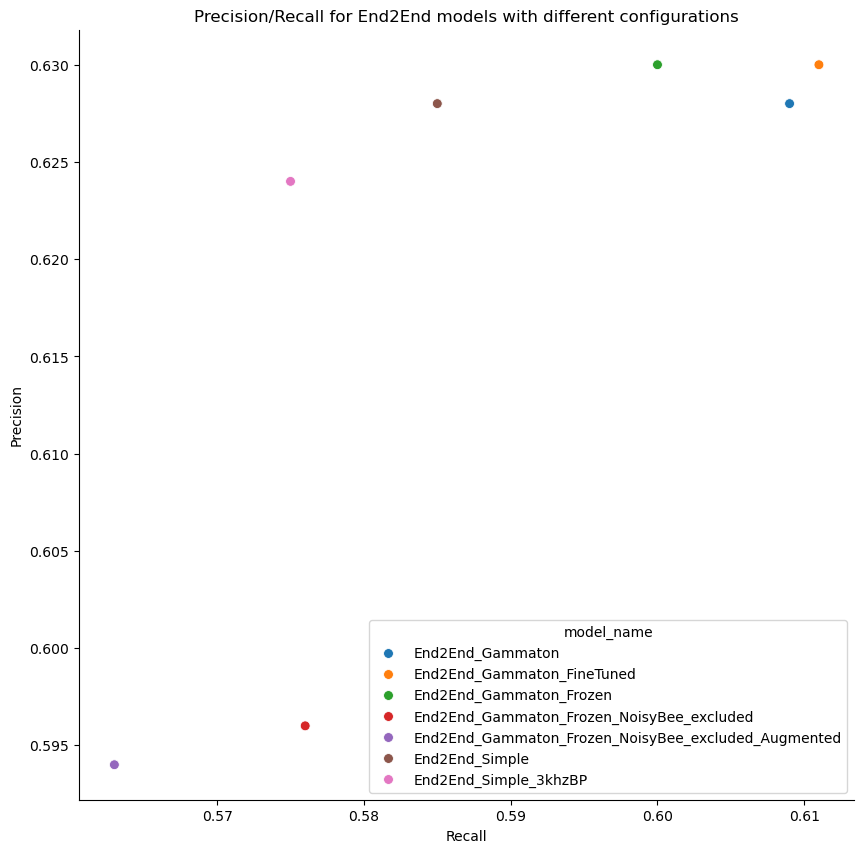

In [24]:
# Best End2End model configuration
results_path = Path(r'results\dataset_V1\End2End_models\results.csv')
results = load_results(results_path)
results.sort_values(by=('macro avg', 'f1-score'), ascending=False, inplace=True)
print(
    results[['macro avg', 'model_name']]
    .drop(columns=[('macro avg', 'support')])
    .rename(lambda x: x.replace('_', ' '), axis=1, level=1)
    .style
    .set_caption('Comparison of End2End models with different configurations')
    .format(formatter=formatter)
    .hide()
    .to_latex()
)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=results.sort_index(), x=('macro avg', 'recall'), y=('macro avg', 'precision'), hue='model_name', s=50)
sns.despine()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall for End2End models with different configurations')

(-2.5500000000000003, 53.55, 0.05823183339089155, 0.1405041003599763)

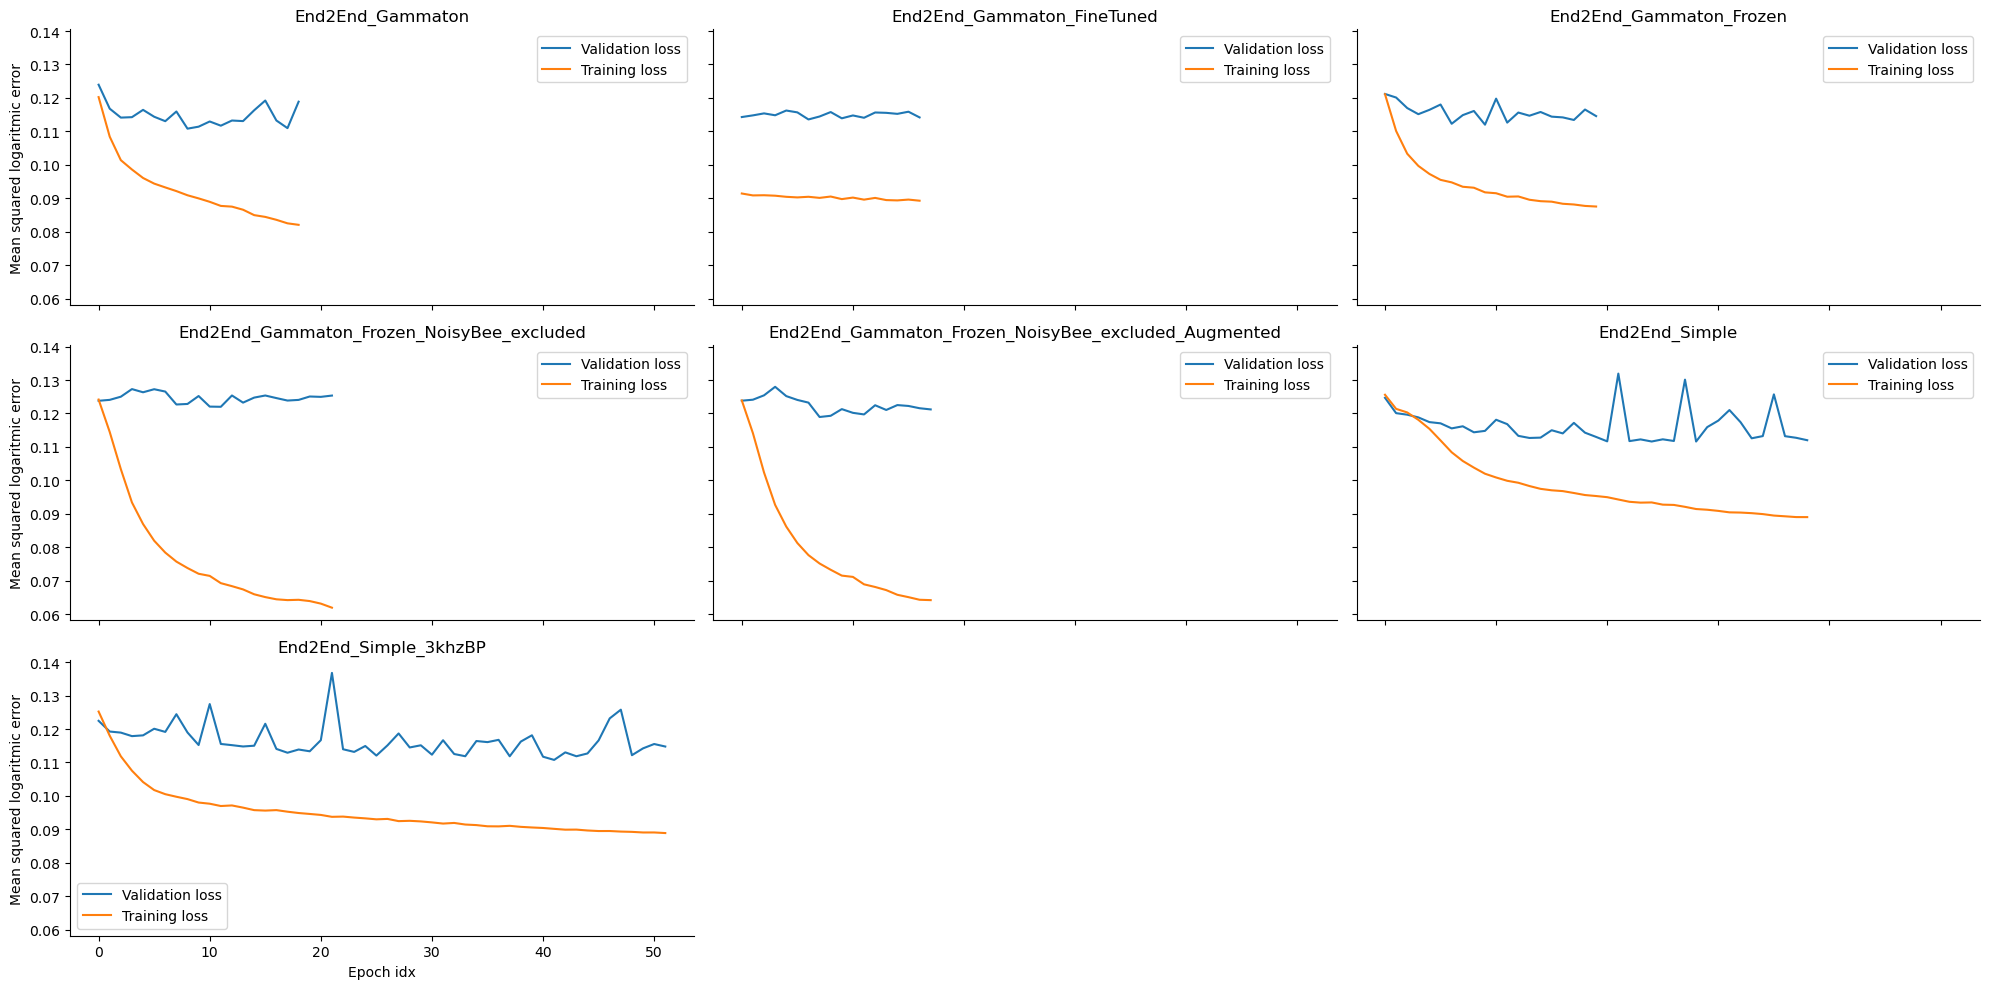

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()
for i, model_path in enumerate(Path(r'results\dataset_V1\End2End_models').rglob('model.h5')):
    ax = axes[i]
    history = np.load(model_path.with_name('history.npy'), allow_pickle=True).item()
    history = pd.DataFrame(history)
    history['epoch idx'] = history.index
    history.rename(lambda x: x.replace('_', ' '), axis=1, inplace=True)
    sns.lineplot(data=history, x='epoch idx', y='val loss', label='Validation loss', ax=ax)
    sns.lineplot(data=history, x='epoch idx', y='loss', label='Training loss', ax=ax)
    sns.despine()
    ax.set_xlabel('Epoch idx')
    ax.set_ylabel('Mean squared logaritmic error')
    ax.set_title(model_path.parent.name)
plt.tight_layout()
axes[-1].axis('off')
axes[-2].axis('off')

# Dataset V3

In [26]:
# Best set of features using KNN
results_path = Path(r'results\dataset_V3\baseline_methods\knn_classification_report\feature_selection_results.csv')
results = load_results(results_path)
results.sort_values(by=('macro avg', 'f1-score'), ascending=False, inplace=True)
' + '.join(list(results.iloc[0].features[results.iloc[0].features].index))

'mfccs + flatness + spectral_centroid + spectral_rolloff + spectral_contrast + zero_crossing_rate + chroma'

In [27]:
def formatter(x):
    if isinstance(x, float):
        return f'{x:.3f}'.rstrip('0')
    elif isinstance(x, bool):
        return '+' if x else '-'
    return x

print(
    results
    .head(5)[['macro avg', 'features']]
    .drop(columns=[('macro avg', 'support'), ('macro avg', 'recall'), ('macro avg', 'precision')])
    .rename(lambda x: x.replace('_', ' '), axis=1, level=1)
    .style
    .set_caption('Top 5 feature sets using KNN')
    .format(formatter=formatter)
    .hide()
    .to_latex()
)

\begin{table}
\caption{Top 5 feature sets using KNN}
\begin{tabular}{rrrrrrrrrr}
macro avg & \multicolumn{9}{r}{features} \\
f1-score & cqt & mfccs & flatness & spectral centroid & spectral rolloff & spectral contrast & zero crossing rate & chroma & STFT \\
0.676 & - & + & + & + & + & + & + & + & - \\
0.675 & - & + & + & + & - & + & + & + & - \\
0.675 & - & + & - & + & + & + & + & + & - \\
0.673 & - & + & + & + & + & + & - & + & - \\
0.672 & - & + & + & - & + & + & + & + & - \\
\end{tabular}
\end{table}



Text(0.5, 1.0, 'Precision/Recall for different feature sets')

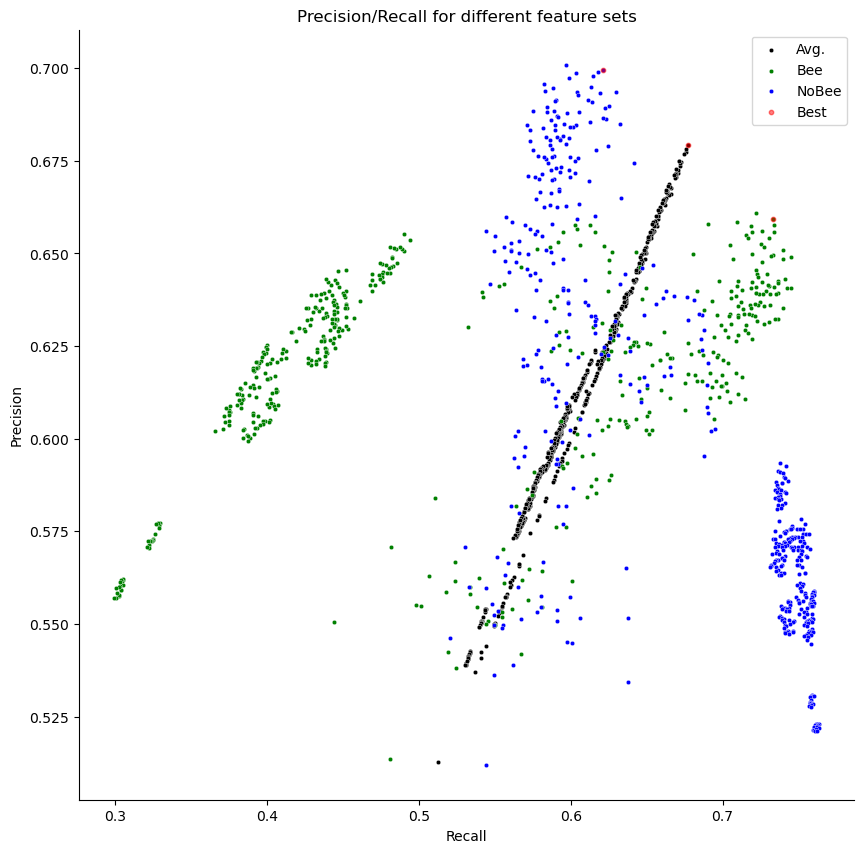

In [28]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=results['macro avg'], x='recall', y='precision', color='black', label='Avg.', s=10)
sns.scatterplot(data=results['Bee'], x='recall', y='precision', color='green', label='Bee', s=10)
ax = sns.scatterplot(data=results['NoBee'], x='recall', y='precision', color='blue', label='NoBee', s=10)
results.iloc[0].to_frame().T.Bee.plot(x='recall', y='precision', color='red', kind='scatter', s=10, ax=ax, alpha=0.5)
results.iloc[0].to_frame().T.NoBee.plot(x='recall', y='precision', color='red', kind='scatter', s=10, ax=ax, alpha=0.5)
results.iloc[0].to_frame().T['macro avg'].plot(x='recall', y='precision', color='red', kind='scatter', s=10, ax=ax, alpha=0.5, label='Best')
sns.despine()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall for different feature sets')

\begin{table}
\caption{Comparison of different classification methods on the winner feature set}
\begin{tabular}{rrrl}
\multicolumn{3}{r}{macro avg} & method \\
f1-score & precision & recall &  \\
0.734 & 0.735 & 0.734 & GradientBoosting \\
0.731 & 0.732 & 0.731 & SVC \\
0.731 & 0.741 & 0.733 & RandomForest \\
0.729 & 0.738 & 0.731 & ExtraTrees \\
0.714 & 0.714 & 0.714 & LogisticRegression \\
0.676 & 0.679 & 0.677 & KNN \\
0.647 & 0.663 & 0.653 & NN \\
0.415 & 0.424 & 0.434 & KMeans \\
\end{tabular}
\end{table}



Text(0.5, 1.0, 'Precision/Recall for different classification methods')

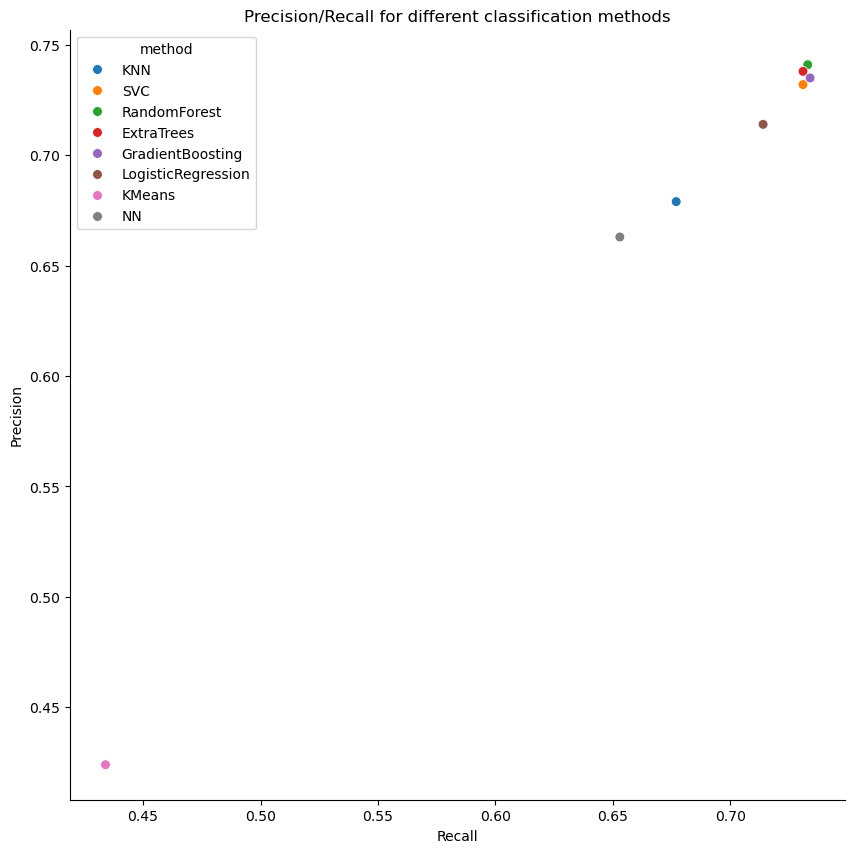

In [29]:
# Best baseline method on the best set of features
results_path = Path(r'results\dataset_V3\baseline_methods\results_methods.csv')
results = load_results(results_path)
results.sort_values(by=('macro avg', 'f1-score'), ascending=False, inplace=True)
print(
    results[['macro avg', 'method']]
    .drop(columns=[('macro avg', 'support')])
    .rename(lambda x: x.replace('_', ' '), axis=1, level=1)
    .style
    .set_caption('Comparison of different classification methods on the winner feature set')
    .format(formatter=formatter)
    .hide()
    .to_latex()
)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=results.sort_index(), x=('macro avg', 'recall'), y=('macro avg', 'precision'), hue='method', s=50)
sns.despine()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall for different classification methods')

\begin{table}
\caption{Comparison of End2End models with different configurations}
\begin{tabular}{rrrl}
\multicolumn{3}{r}{macro avg} & model_name \\
f1-score & precision & recall &  \\
0.792 & 0.812 & 0.795 & End2End_Gammaton_Frozen \\
0.776 & 0.794 & 0.779 & End2End_Gammaton_Frozen_NoisyBee_excluded \\
0.776 & 0.799 & 0.78 & End2End_Gammaton_Frozen_NoisyBee_excluded_Augmented \\
0.76 & 0.765 & 0.761 & End2End_Simple_3khzBP \\
0.736 & 0.752 & 0.739 & End2End_Simple \\
0.725 & 0.746 & 0.73 & End2End_Gammaton \\
0.619 & 0.75 & 0.655 & End2End_Gammaton_FineTuned \\
\end{tabular}
\end{table}



Text(0.5, 1.0, 'Precision/Recall for End2End models with different configurations')

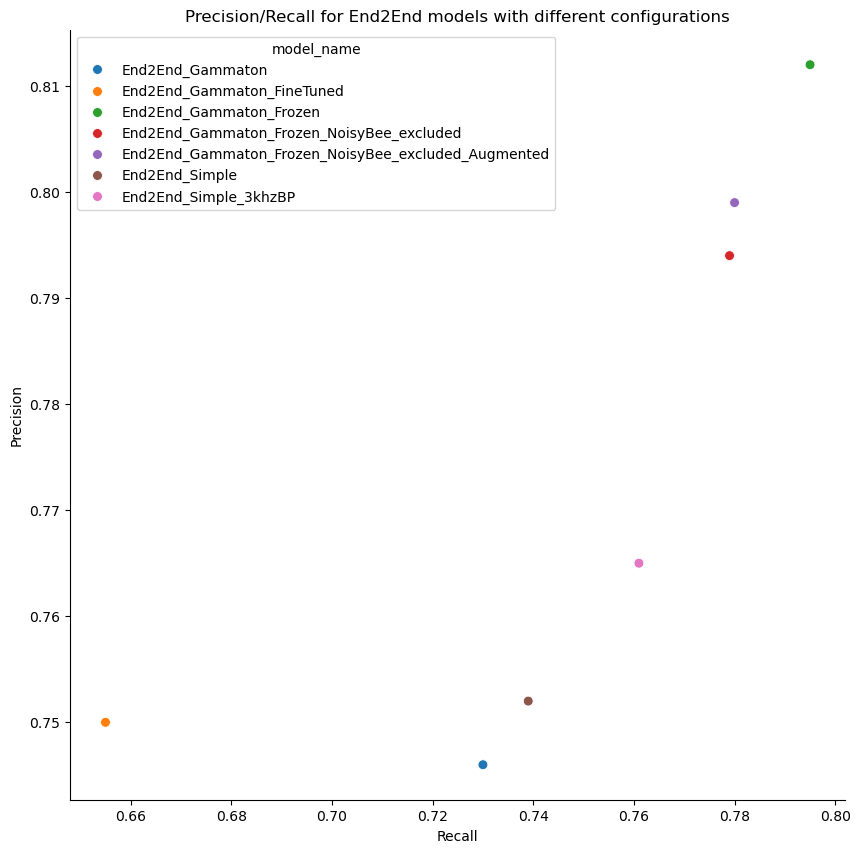

In [30]:
# Best End2End model configuration
results_path = Path(r'results\dataset_V3\End2End_models\results.csv')
results = load_results(results_path)
results.sort_values(by=('macro avg', 'f1-score'), ascending=False, inplace=True)
print(
    results[['macro avg', 'model_name']]
    .drop(columns=[('macro avg', 'support')])
    .rename(lambda x: x.replace('_', ' '), axis=1, level=1)
    .style
    .set_caption('Comparison of End2End models with different configurations')
    .format(formatter=formatter)
    .hide()
    .to_latex()
)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=results.sort_index(), x=('macro avg', 'recall'), y=('macro avg', 'precision'), hue='model_name', s=50)
sns.despine()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall for End2End models with different configurations')

(-4.15, 87.15, 0.04006763584911823, 0.18389485739171504)

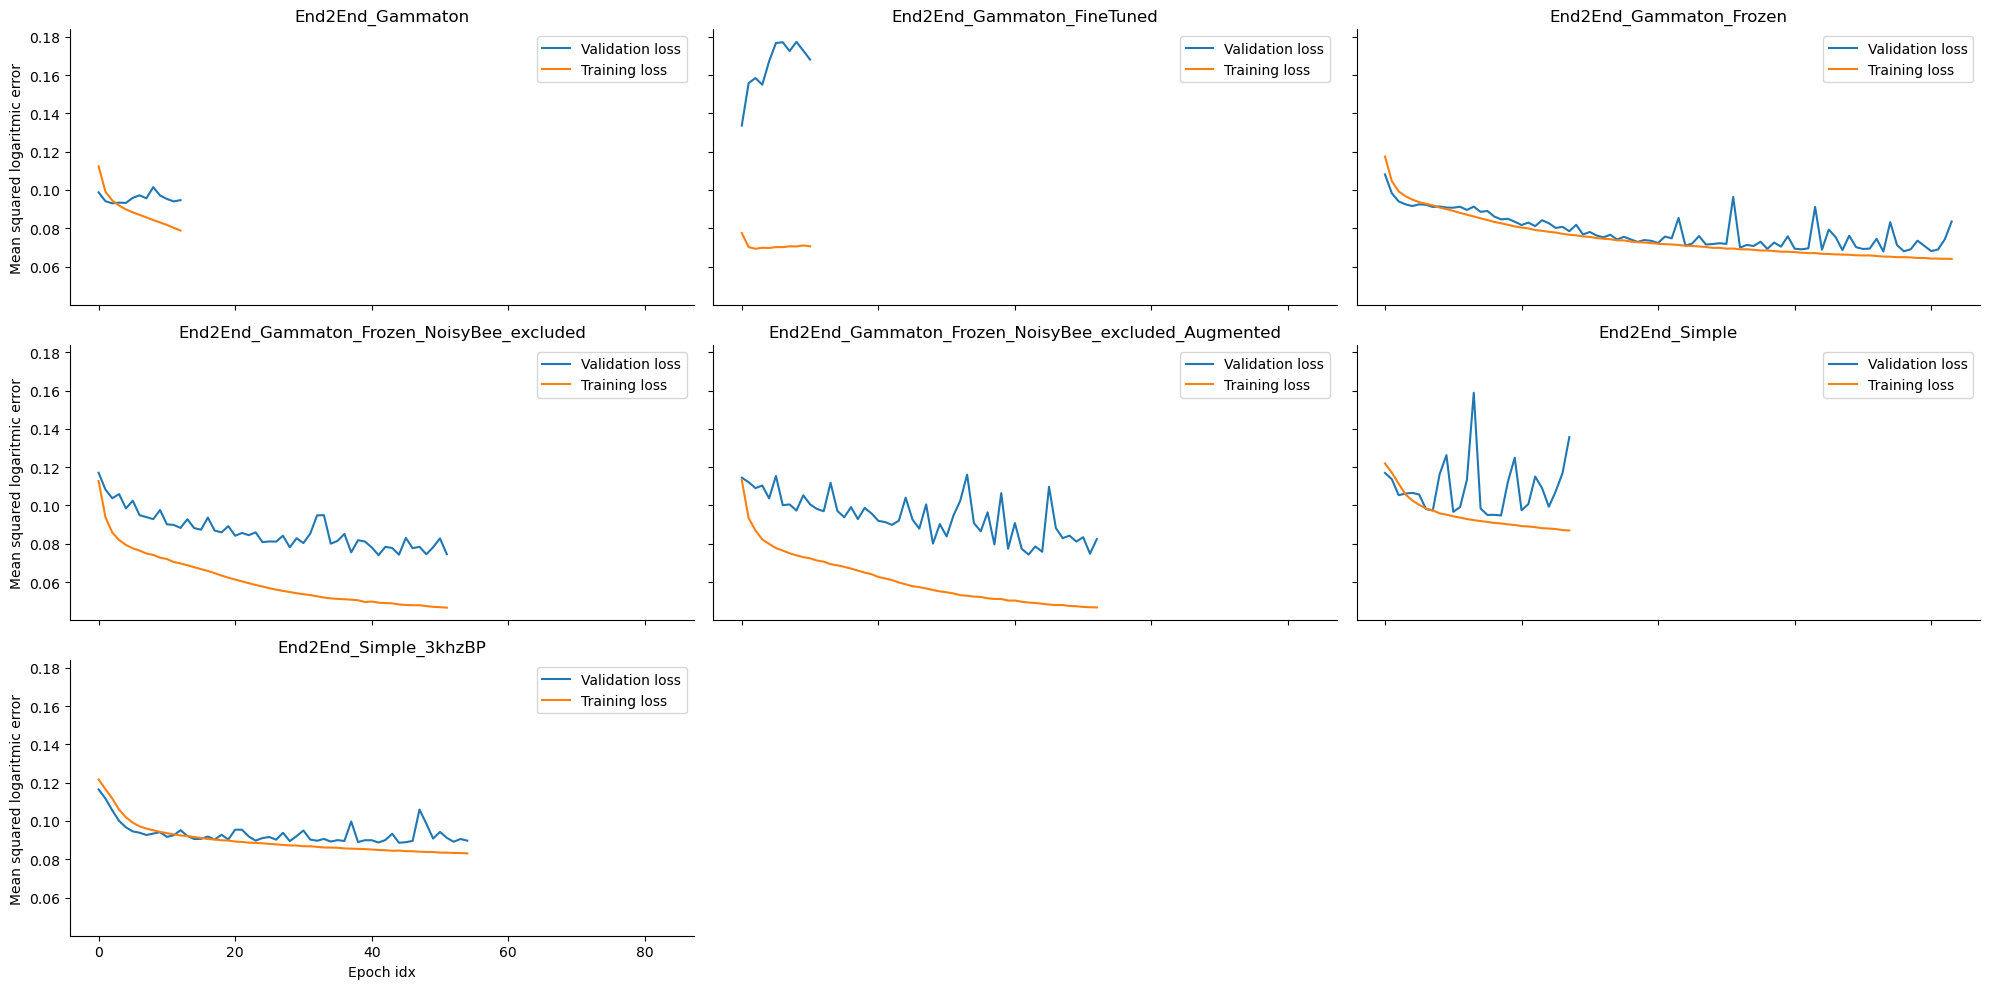

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()
for i, model_path in enumerate(Path(r'results\dataset_V3\End2End_models').rglob('model.h5')):
    ax = axes[i]
    history = np.load(model_path.with_name('history.npy'), allow_pickle=True).item()
    history = pd.DataFrame(history)
    history['epoch idx'] = history.index
    history.rename(lambda x: x.replace('_', ' '), axis=1, inplace=True)
    sns.lineplot(data=history, x='epoch idx', y='val loss', label='Validation loss', ax=ax)
    sns.lineplot(data=history, x='epoch idx', y='loss', label='Training loss', ax=ax)
    sns.despine()
    ax.set_xlabel('Epoch idx')
    ax.set_ylabel('Mean squared logaritmic error')
    ax.set_title(model_path.parent.name)
plt.tight_layout()
axes[-1].axis('off')
axes[-2].axis('off')

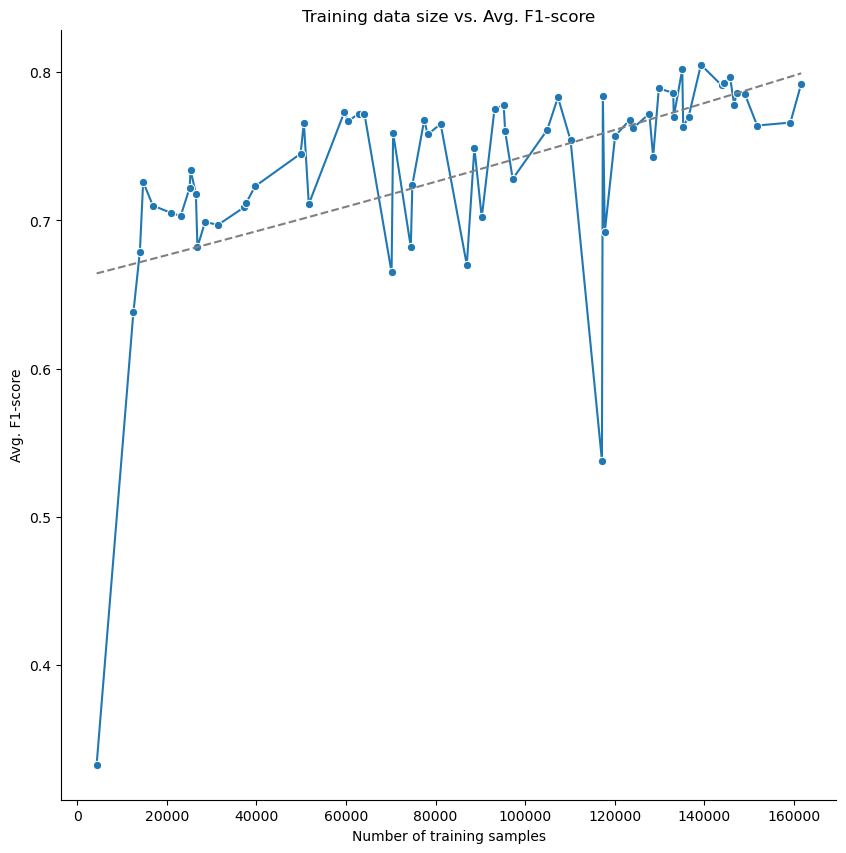

In [32]:
# Impact of training data size on the performance of the best End2End model
results_path = Path(r'results\dataset_V3\data_size_impact\gammatone_frozen\results.csv')
results = load_results(results_path)
plt.figure(figsize=(10, 10))
sns.lineplot(data=results, x='n_train_samples', y=('macro avg', 'f1-score'), marker='o')
sns.despine()
plt.xlabel('Number of training samples')
plt.ylabel('Avg. F1-score')
plt.title('Training data size vs. Avg. F1-score')

# fit an exponential curve to the data using numpy's polyfit
x = results.n_train_samples
y = results[('macro avg', 'f1-score')]
coefficients = np.polyfit(x, np.log(y), 1)
# plot the fitted curve
plt.plot(x, np.exp(coefficients[1]) * np.exp(coefficients[0] * x), label='Fitted curve', linestyle='--', color='gray')

In [33]:
# 5-fold cross-validation results of the best End2End model
results_path = Path(r'results\dataset_V3\KFold\results.csv')
results = load_results(results_path)
results.describe()

Bee                                       NoBee  \
       accuracy  f1-score precision    recall       support  f1-score   
count  5.000000  5.000000    5.0000  5.000000      5.000000  5.000000   
mean   0.719800  0.696200    0.8240  0.647800  11141.600000  0.706200   
std    0.069611  0.033207    0.1499  0.178147   1097.288385  0.183693   
min    0.599000  0.645000    0.5580  0.500000   9597.000000  0.378000   
25%    0.725000  0.685000    0.8610  0.558000  10713.000000  0.776000   
50%    0.744000  0.704000    0.8870  0.592000  11004.000000  0.784000   
75%    0.765000  0.716000    0.9050  0.635000  12195.000000  0.793000   
max    0.766000  0.731000    0.9090  0.954000  12199.000000  0.800000   

                                        macro avg                      \
      precision    recall       support  f1-score precision    recall   
count  5.000000  5.000000      5.000000  5.000000  5.000000  5.000000   
mean   0.716400  0.791800  11141.600000  0.701200  0.770400  0.719800   
std    0.072759  0.306834   1097.288385  0.091933  0.040091  0.069611   
min    0.655000  0.244000   9597.000000  0.541000  0.700000  0.599000   
25%    0.678000  0.898000  10713.000000  0.710000  0.782000  0.725000   
50%    0.697000  0.929000  11004.000000  0.735000  0.783000  0.744000   
75%    0.711000  0.938000  12195.000000  0.758000  0.786000  0.765000   
max    0.841000  0.950000  12199.000000  0.762000  0.801000  0.766000   

                   weighted avg                                   
           support     f1-score precision    recall      support  
count      5.00000     5.000000  5.000000  5.000000      5.00000  
mean   22283.20000     0.701200  0.770400  0.719800  22283.20000  
std     2194.57677     0.091933  0.040091  0.069611   2194.57677  
min    19194.00000     0.541000  0.700000  0.599000  19194.00000  
25%    21426.00000     0.710000  0.782000  0.725000  21426.00000  
50%    22008.00000     0.735000  0.783000  0.744000  22008.00000  
75%    24390.00000     0.758000  0.786000  0.765000  24390.00000  
max    24398.00000     0.762000  0.801000  0.766000  24398.00000

In [34]:
results.median(numeric_only=True)

              accuracy         0.744
Bee           f1-score         0.704
              precision        0.887
              recall           0.592
              support      11004.000
NoBee         f1-score         0.784
              precision        0.697
              recall           0.929
              support      11004.000
macro avg     f1-score         0.735
              precision        0.783
              recall           0.744
              support      22008.000
weighted avg  f1-score         0.735
              precision        0.783
              recall           0.744
              support      22008.000
dtype: float64

In [35]:
import tensorflow as tf

In [39]:
model_path = Path(r'results\dataset_V1\baseline_methods\NN_model\model.h5')
model = tf.keras.models.load_model(model_path)

In [40]:
model.input_shape

(None, 3)